In [27]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np

In [28]:
csv_file_path = 'training.csv'
df = pd.read_csv(csv_file_path, header=0)

In [ ]:
import random

training_size = 111111

rows = len(df)
from_loc = random.randint(0, rows-1-training_size)
to_loc = from_loc + training_size

copy = df.iloc[from_loc : to_loc].copy()

print(len(copy))

copy['position'] = copy['position'].apply(ast.literal_eval)
copy['metadata'] = copy['metadata'].apply(ast.literal_eval)

X_board = np.array(copy['position'].tolist())
X_metadata = np.array(copy['metadata'].tolist())

y = copy['eval']

111111


c:\Users\Sebastian Munthe\.conda\envs\tf-cpu\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['board_input', 'metadata_input']. Received: the structure of inputs={'board_input': '*', 'metadata_input': '*'}
  warnings.warn(


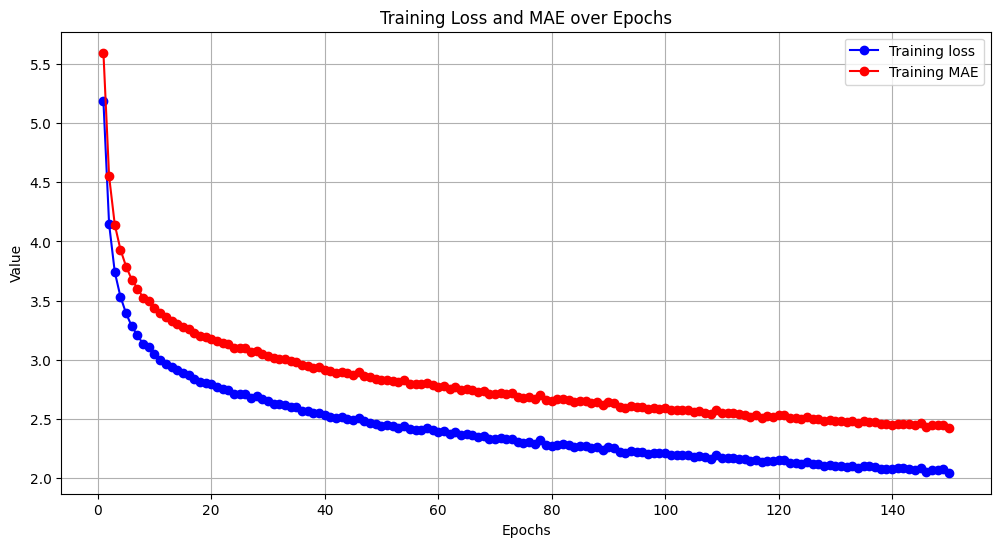

In [ ]:
model = load_model('chess_evaluator.keras')

model.compile(
    loss='huber', optimizer="adam", metrics=['mae']
)

history = model.fit(
    {'board_input': X_board, 'metadata_input': X_metadata},
    y,
    batch_size=128,
    epochs=200,
    verbose=0,  
)


# Assuming `history` is the output from the model training
loss = history.history['loss']
mae = history.history['mae']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, mae, 'ro-', label='Training MAE')
plt.title('Training Loss and MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

model.save("chess_evaluator.keras")


In [20]:
print(from_loc)

146269
